In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from numpy import fft
from numpy import random as rnd
from scipy.ndimage import filters
import register, imp
imp.reload(register)

# oasis needs some parameters
ops = {
        'tau':  1., # this is the only parameter used for deconvolution per se        
        'fs': 10.,  # sampling rate        
        'baseline': 'maximin', # baselining mode
        'win_baseline': 60., # window for maximin
        'sig_baseline': 10., # smoothing constant for gaussian filter 
        'prctile_baseline': 8.,# smoothing constant for gaussian filter        
        'neucoeff': .7,  # neuropil coefficient 
        'neumax': 1.,  # maximum neuropil coefficient (not implemented)
        'niterneu': 5, # number of iterations when the neuropil coefficient is estimated (not implemented)
        'maxregshift': 0.,
        'subpixel' : 10,
        'batch_size': 400, 
        'num_workers': 0, # 0 to select automatically, -1 to disable parallelism, N to enforce value
        'XYzeroed' : 0
      }

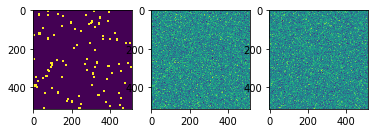

In [2]:
# simulate some data with shifts
nimg = ops['batch_size']

Ly = 512
Lx = 512
pcell = 100./(Ly*Lx)
refImg = np.ceil(pcell- rnd.uniform(0,1, (Ly,Lx))).astype('float32')
refImg = filters.maximum_filter1d(refImg, 11, axis=0)
refImg = filters.maximum_filter1d(refImg, 11, axis=1)

data = rnd.normal(0,1.,(nimg, Ly, Lx)).astype('float32')

yoff = (10 * (rnd.uniform(0,1,nimg)-.5)).astype('int')
xoff = (10 * (rnd.uniform(0,1,nimg)-.5)).astype('int')

for j in range(0,nimg):
    data[j,:,:] += np.roll(refImg, (yoff[j],xoff[j]), (0,1))

[nimg, Ly, Lx] = data.shape
plt.subplot(131)
plt.imshow(refImg)
plt.subplot(132)
plt.imshow(data[0,:,:])
plt.subplot(133)
plt.imshow(data[1,:,:])

plt.show()

In [3]:
imp.reload(register)

tstart = time.time()
X, ymax, xmax = register.phasecorr(data, refImg, ops)
tend = time.time()

cy = np.corrcoef(ymax, yoff)[0,1]
cx = np.corrcoef(ymax, yoff)[0,1]

print('took %2.2f seconds for %d frames of %dx%d'%(tend-tstart, nimg, Ly, Lx))

print('correlation with X %2.4f'%cx)
print('correlation with Y %2.4f'%cy)

plt.subplot(121)
plt.plot(ymax[:200])
plt.plot(yoff[:200])
plt.subplot(122)
plt.plot(xmax[:200])
plt.plot(xoff[:200])

plt.show()

KeyError: 'XYzeroed'